# 引入包

In [1]:
# -*- coding: utf-8 -*-  
import pandas as pd
#from pandas import DataFrame,Series
import numpy as np
#import jieba
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
#import jieba.posseg as pseg
import re
import pickle
%matplotlib inline

# 读取图书分类文件并进行数据预处理
## 1、类别只取字母;2、主题词去掉表示年代的数字以及‘—’分割符。

In [2]:
comment = pd.read_excel('CIPData.XLS')
fl = []
for i in comment.分类号:
    fl.append(i[0:1])
comment['fl'] = fl
for i in comment.index:
    b = []
    a = comment['主题词'][i].split('－')
    for word in a:
        b.append(re.sub('；|0|1|2|3|4|5|6|7|8|9|～|-|、|x','',word))
    while '' in b:
        b.remove('')
    comment['主题词'][i] = b
comment[['正书名','主题词','fl']][:5]

,正书名,主题词,fl
0,上海调查年鉴,"[统计资料, 上海市, 年鉴, 汉英]",C
1,广西统计年鉴,"[统计资料, 广西, 年鉴, 汉英]",C
2,福建企业年鉴,"[企业经济, 福建省, 年鉴]",F
3,天津调查年鉴,"[统计资料, 天津市, 年鉴, 汉英]",C
4,海口统计年鉴,"[统计资料, 海口市, 年鉴]",C


### 对主题词的分布情况进行分析

In [3]:
l = np.array(comment['主题词'])
l

array([list(['统计资料', '上海市', '年鉴', '汉英']),
       list(['统计资料', '广西', '年鉴', '汉英']), list(['企业经济', '福建省', '年鉴']), ...,
       list(['经济统计', '保定', '年鉴']), list(['文化产业', '产业发展', '概况', '山西省']),
       list(['毕业生', '高中', '升学参考资料高等学校', '招生', '介绍', '中国'])], dtype=object)

In [4]:
g=[]
s = 0
for i in l:
    g.append(len(i))
max(g),min(g)   #最大,最小主题词的数量

(17, 1)

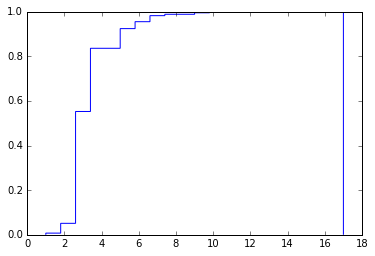

In [5]:
comment.drop(comment.index[1249],inplace=True)
g = np.array(g)
#绘制累积曲线
def drawCumulativeHist(heights):
    #创建累积曲线
    #第一个参数为待绘制的定量数据
    #第二个参数为划分的区间个数
    #normed参数为是否无量纲化
    #histtype参数为'step'，绘制阶梯状的曲线
    #cumulative参数为是否累积
    plt.hist(heights, 20, normed=True, histtype='step', cumulative=True)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()
ggg = plt.hist(g, 20, normed=True, histtype='step', cumulative=True)


In [6]:
# 从累积曲线看90%的数量在7以下。故特征可以取7个，大于7个的从7个处截断.
comment[5:7]

,正书名,第一责任者及著作方式,内容提要,主题词,分类号,fl
5,上海统计年鉴,"上海市统计局, 编",本书是一本信息高度密集的资料工具书。本书收录了2010年上海的经济和社会等各方面的统计数据，...,"[统计资料, 上海市, 年鉴, 汉英]",C832.51-54,C
6,中国高技术产业统计年鉴,"国家统计局, 国家发展与改革委员会, 科学技术部, 编",为反映我国高技术产业发展状况和国际竞争能力，满足国家宏观管理部门制订调整产业政策和产业发展规...,"[高技术产业, 统计资料, 中国, 年鉴, 汉英]",F279.244.4-54,F


## 分割训练集合测试集 分别占80%和20%

In [7]:
n = int(len(comment)*0.8) #分割80%样本作为训练集
comment_train = comment[:n]
fl = set(comment_train['fl'])
len(fl)                 #包含分类数

17

In [8]:
n = int(len(comment)*0.8)

In [9]:
n

1804

In [10]:
cg = comment_train.sort('fl')
from collections import Counter
fl_d = dict(Counter(cg.fl))
#len(cg)
#type(fl_d)
cc = pd.DataFrame(fl_d,['fl'])
#cc
cc = cc.T
cc.fl = cc.fl/cc.fl.sum()
# 每种分类的数量
cc

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,fl
B,0.000554
C,0.598670
D,0.033814
E,0.007761
F,0.271619
G,0.031596
H,0.000554
I,0.000554
J,0.001663
K,0.006652


In [11]:
# 查看某个分类下的主题词组,本例子为K分类下的主题词组
zt_k = []
for i in cg.index:
    if cg.fl[i]=='K':
        zt_k.append(cg.主题词[i])
zt_k

[['经济', '普查', '先进工作者', '先进事迹', '中国'],
 ['广安市', '概况'],
 ['乡镇', '行政区划', '中国', '手册'],
 ['经济', '普查', '先进工作者', '先进事迹', '徐州市', '画册'],
 ['乡镇', '行政区划', '中国', '手册'],
 ['北京科技大学', '研究生：模范学生', '先进事迹'],
 ['妇女', '企业家', '调查报告', '中国', '企业经济', '经济可持续发展', '调查报告', '中国'],
 ['节日', '经济统计', '研究', '中国'],
 ['乡镇', '行政区划', '中国', '手册'],
 ['旅游指南', '嵊泗县'],
 ['统计', '先进工作者', '先进事迹', '江西'],
 ['乡镇', '行政区划', '中国', '手册']]

In [12]:
len(cg)

1804

### 构建交叉表 以关键词为索引,以分类为字段名

In [13]:
l=[]
for i in cg.index: 
     l = l+cg['主题词'][i]    
ll = set(l)
data = np.ones((len(fl),len(ll)))
df = pd.DataFrame(data, index=fl, columns=ll)
df[:10]

,岗位培训,投入产出经济学,大同市,运城,上海,安徽省,成本效益分析,中国科学技术协会,社会发展,湖南省,...,贵阳市,统计报表制度,石城县,高等职业教育,商品购买力,成都市,资本市场,河北,廊坊,云南省
G,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Q,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
I,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
O,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
E,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 技巧1.给每个特征值增加1,以避免作除法时分母为零。

In [14]:
for i in cg.index:
    namei = cg['fl'][i]
    temp =cg['主题词'][i]
    for word in temp:
        df[namei:namei][word]+=1 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
df[:5]

,岗位培训,投入产出经济学,大同市,运城,上海,安徽省,成本效益分析,中国科学技术协会,社会发展,湖南省,...,贵阳市,统计报表制度,石城县,高等职业教育,商品购买力,成都市,资本市场,河北,廊坊,云南省
G,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C,7.0,1.0,9.0,2.0,2.0,9.0,1.0,1.0,1.0,9.0,...,6.0,3.0,2.0,2.0,1.0,5.0,1.0,2.0,1.0,13.0
T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Q,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
df['Col_sum'] = df.apply(lambda x: x.sum(), axis=1)

In [17]:
total = df['Col_sum'].sum()
total

20593.0

In [18]:
df['Col_g'] = df['Col_sum']/total

In [19]:
#计算tag在每个分类中的频率
for item in df.columns:
    if item == 'Col_sum' or item =='Col_g':
         continue
    df[item]=df[item]/df['Col_sum']

In [20]:
df[:5]

,岗位培训,投入产出经济学,大同市,运城,上海,安徽省,成本效益分析,中国科学技术协会,社会发展,湖南省,...,石城县,高等职业教育,商品购买力,成都市,资本市场,河北,廊坊,云南省,Col_sum,Col_g
G,0.000933,0.000933,0.000933,0.000933,0.000933,0.001866,0.000933,0.001866,0.000933,0.000933,...,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,1072.0,0.052057
C,0.001596,0.000228,0.002052,0.000456,0.000456,0.002052,0.000228,0.000228,0.000228,0.002052,...,0.000456,0.000456,0.000228,0.001140,0.000228,0.000456,0.000228,0.002964,4386.0,0.212985
T,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,...,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,0.001155,866.0,0.042053
P,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,...,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,0.001211,826.0,0.040111
Q,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,...,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,828.0,0.040208


#### 技巧2 取log

In [21]:
#为避免小数位过多，取对数，则把独立相乘关系变成相加关系
for item in df.columns:
    if item == 'Col_sum':
         continue
    df[item]=np.log(df[item])


In [22]:
df[:5]

,岗位培训,投入产出经济学,大同市,运城,上海,安徽省,成本效益分析,中国科学技术协会,社会发展,湖南省,...,石城县,高等职业教育,商品购买力,成都市,资本市场,河北,廊坊,云南省,Col_sum,Col_g
G,-6.977281,-6.977281,-6.977281,-6.977281,-6.977281,-6.284134,-6.977281,-6.284134,-6.977281,-6.977281,...,-6.977281,-6.977281,-6.977281,-6.977281,-6.977281,-6.977281,-6.977281,-6.977281,1072.0,-2.955425
C,-6.440263,-8.386173,-6.188948,-7.693026,-7.693026,-6.188948,-8.386173,-8.386173,-8.386173,-6.188948,...,-7.693026,-7.693026,-8.386173,-6.776735,-8.386173,-7.693026,-8.386173,-5.821224,4386.0,-1.546534
T,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,...,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,-6.763885,866.0,-3.168822
P,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,...,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,-6.716595,826.0,-3.216112
Q,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,...,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,-6.719013,828.0,-3.213693


### 查表预测代码

In [24]:
def predictor(words):
    l=0
    for word in words:
        try:
            l +=df[word]
        except: 
            print(df[word])
    l=l+df['Col_g']
    ll=l.to_dict()
    p = max(ll.items(), key=lambda x: x[1])
    print(p)

### 对测试集两个具体样本进行推测

##### 对《上海统计年鉴》主题词进行推理

In [25]:
predictor(['统计资料', '上海市', '年鉴', '汉英'])

('C', -13.94292639999329)


##### 对《中国高技术产业统计年鉴》主题词进行推理

In [26]:
predictor(['高技术产业', '统计资料', '中国', '年鉴', '汉英'])

('F', -18.647214710355513)


### 进行测试集准确率测试

In [27]:
test = comment[n:]
test.reindex()
words = test['主题词']

In [28]:
# 朴素贝叶斯算法
m=[]
for i in test.index:
    words = test['主题词'][i]
    l=0
    for word in words:
        try:
            l +=df[word]
        except: 
            print(word)
    l=l+df['Col_g']
    ll=l.to_dict()
    f = max(ll.items(), key=lambda x: x[1])
    m.append(f[0])

石油化学工业
企业集团
评估金融
评估
渭南
汉中
郴州
吉安
崇左市
试验设计
网络经济
焦作市
保定
区域金融中心
延安
农业信贷
信贷资金管理
江阴
按要素分配
阳江市
宿迁
文集社会发展
投资公司
消费支出
统计年鉴
吕梁
台州
汽车保险
长沙
连云港
农业发展
中国农民收入
收入增长
许昌市
基层工作
通化市
统计工作
摄影集
分析
经济发展趋势
科学研究组织机构
企业法
中国行政法
零售贸易
商业统计学
漳州市
诺贝尔经济学奖
经济学家
生平事迹
通俗读物数学
石油需求
市场需求分析
中国煤炭
市场需求分析
体育产业
工作方法
荆州
绍兴
旅馆
大连
经济失衡
经济指标
大连
应用文
台湾省
工业技术
技术革新
百科全书医学遗传学
遥感技术
作物
种植面积
宝鸡
嘉兴
九江
旅游业发展
青岛
河池市
经济统计能源经济
保定
升学参考资料高等学校


In [29]:
test_fl = list(test['fl'])
test_fl
t=0
for i,j in zip(m,test_fl):
    if i==j:
        t+=1
print('测试集准确率：',t/len(m)*100)

测试集准确率： 88.93805309734513


# 使用独热码形式进行训练

In [31]:
c=[]
for item in comment['主题词']:
    c.append(item)
c[:5]

[['统计资料', '上海市', '年鉴', '汉英'],
 ['统计资料', '广西', '年鉴', '汉英'],
 ['企业经济', '福建省', '年鉴'],
 ['统计资料', '天津市', '年鉴', '汉英'],
 ['统计资料', '海口市', '年鉴']]

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
x = c
x = MultiLabelBinarizer().fit_transform(x)
#classif.fit(X, y).predict(X)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#gnb = GaussianNB()
#gnb = MultinomialNB()
gnb = BernoulliNB()

In [34]:
y=[]
for item in cg['fl']:
    y.append(item)
y[:5]

['B', 'C', 'C', 'C', 'C']

In [35]:
len(x[:1804]),len(y)

(1804, 1804)

In [36]:
gnb_model = gnb.fit(x[:1804],y)

In [37]:
test_x = list(test['主题词'])
test_x[0]

['中国经济', '经济增长', '研究']

In [38]:
yy = gnb_model.predict(x[1805:])
len(yy)

451

In [39]:
t=0
for i,j in zip(yy,test_fl):
    if i==j:t+=1
print(t/len(yy))  #贝努利推测准确率

0.5853658536585366


##  使用sklearn包三种方法进行构建

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer

#nbc means naive bayes classifier
nbc_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])
nbc_2 = Pipeline([
    ('vect', HashingVectorizer(non_negative=True)),
    ('clf', MultinomialNB()),
])
nbc_3 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

nbcs = [nbc_1, nbc_2, nbc_3]

In [41]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
import numpy as np

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

In [42]:
y=[]
for item in comment['fl']:
    y.append(item)
y[:5]

['C', 'C', 'F', 'C', 'C']

### 使用TF-IDF算法构建矩阵

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer  
Tf = TfidfVectorizer()
X=[]
for item in c:
    w=''
    for word in item:
        w += word
        w +=' '
    X.append(w)
X[:10]    

['统计资料 上海市 年鉴 汉英 ',
 '统计资料 广西 年鉴 汉英 ',
 '企业经济 福建省 年鉴 ',
 '统计资料 天津市 年鉴 汉英 ',
 '统计资料 海口市 年鉴 ',
 '统计资料 上海市 年鉴 汉英 ',
 '高技术产业 统计资料 中国 年鉴 汉英 ',
 '经济 普查 研究成果 汇编 重庆市 ',
 '统计 中国 文集 ',
 '统计资料 辽宁省 年鉴 ']

In [44]:
X_t = Tf.fit_transform(X)
X_aa = X_t.toarray()
X_aa.shape
SPLIT_PERC = 0.75
split_size = int(len(y)*SPLIT_PERC)
X_train = X_aa[:split_size]
X_test = X_aa[split_size:]
Y_train = y[:split_size]
Y_test = y[split_size:]
model = gnb.fit(X_train, Y_train)
yy = model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [45]:
t=0
for i,j in zip(yy,Y_test):
    if i==j:
        t+=1
print('测试集准确率：',t/len(yy))

测试集准确率： 0.8368794326241135
